<a href="https://colab.research.google.com/github/yleessam/start/blob/main/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_240425_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국민건강보험공단_건강검진정보 데이터 분석

https://www.data.go.kr/iim/api/selectAPIAcountView.do#/API%20%EB%AA%A9%EB%A1%9D/getuddi%3A5480485a-51d8-48c7-983d-fb6c6fd3b2ad

In [ ]:
import pandas as pd

In [ ]:
# CSV 파일 불러오기 및 데이터프레임 생성
df = pd.read_csv('./upload.CSV', encoding='euc-kr')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   시도코드         1000000 non-null  int64  
 3   성별           1000000 non-null  int64  
 4   연령대코드(5세단위)  1000000 non-null  int64  
 5   신장(5cm단위)    1000000 non-null  int64  
 6   체중(5kg단위)    1000000 non-null  int64  
 7   허리둘레         999608 non-null   float64
 8   시력(좌)        999814 non-null   float64
 9   시력(우)        999815 non-null   float64
 10  청력(좌)        999885 non-null   float64
 11  청력(우)        999884 non-null   float64
 12  수축기혈압        994444 non-null   float64
 13  이완기혈압        994444 non-null   float64
 14  식전혈당(공복혈당)   994389 non-null   float64
 15  총콜레스테롤       345618 non-null   float64
 16  트리글리세라이드     345614 non-null   float64
 17  HDL콜레스테롤     345614 non-null   float64
 18  LDL

In [ ]:
df.isnull().sum()

기준년도                0
가입자일련번호             0
시도코드                0
성별                  0
연령대코드(5세단위)         0
신장(5cm단위)           0
체중(5kg단위)           0
허리둘레              392
시력(좌)             186
시력(우)             185
청력(좌)             115
청력(우)             116
수축기혈압            5556
이완기혈압            5556
식전혈당(공복혈당)       5611
총콜레스테롤         654382
트리글리세라이드       654386
HDL콜레스테롤       654386
LDL콜레스테롤       660926
혈색소              5616
요단백             11054
혈청크레아티닌          5615
혈청지오티(AST)       5613
혈청지피티(ALT)       5613
감마지티피            5611
흡연상태               96
음주여부               73
구강검진수검여부            0
치아우식증유무        655671
치석             655670
dtype: int64

In [ ]:
# prompt: df의 성별 컬럼의 값 갯수를 세

df['성별'].value_counts()


성별
1    515301
2    484699
Name: count, dtype: int64

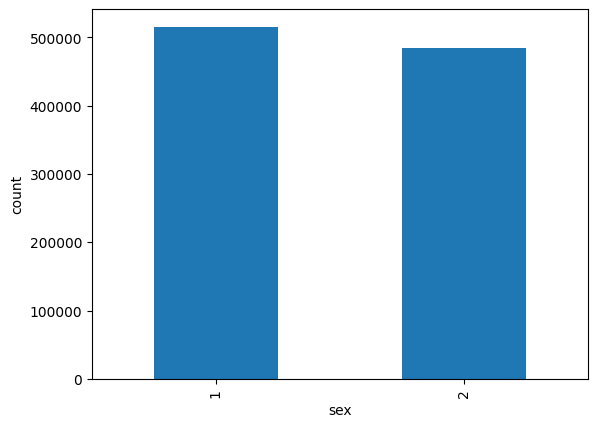

In [ ]:
# prompt: 성별로 막대그래프를 그려

import matplotlib.pyplot as plt
df['성별'].value_counts().plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('count')

plt.show()


In [ ]:
# prompt: 시도코드별로 성별을 집계해

sex_df = df.groupby('시도코드')['성별'].value_counts()
sex_df

In [ ]:
# prompt: sex_df를 이용해 성별의 값을 이용해 컬럼을 추가해

sex_df = sex_df.unstack()
sex_df.columns = ['남성', '여성']
sex_df.head()


,남성,여성
시도코드,,
11,84599,93158
26,32214,32280
27,22720,22195
28,30146,28424
29,13945,14062


## 건강검진정보 수집

In [ ]:
import requests

key='ZOJaRUpc9%2BASXmHK%2BgdHOVJWm2N5lqKIxpn%2FeKo7m%2FrPxhlItMRXm3dxXGfHDVMXjMaD0RC0X8R9gTZdoXEDYA%3D%3D'
url = f"https://api.odcloud.kr/api/15007122/v1/uddi:5480485a-51d8-48c7-983d-fb6c6fd3b2ad?serviceKey={key}&page=1&perPage=10"
response = requests.get(url)
data = response.json()
#print(data)


In [ ]:
# 데이터 불러오기
df = pd.DataFrame(data)
df.head()

,currentCount,data,matchCount,page,perPage,totalCount
0,10,"{'(혈청지오티)ALT': '11', '(혈청지오티)AST': '20', '가입자일...",1000000,1,10,1000000
1,10,"{'(혈청지오티)ALT': '12', '(혈청지오티)AST': '26', '가입자일...",1000000,1,10,1000000
2,10,"{'(혈청지오티)ALT': '15', '(혈청지오티)AST': '16', '가입자일...",1000000,1,10,1000000
3,10,"{'(혈청지오티)ALT': '10', '(혈청지오티)AST': '17', '가입자일...",1000000,1,10,1000000
4,10,"{'(혈청지오티)ALT': '10', '(혈청지오티)AST': '9', '가입자일련...",1000000,1,10,1000000


In [ ]:
# 데이터 구조 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   currentCount  10 non-null     int64 
 1   data          10 non-null     object
 2   matchCount    10 non-null     int64 
 3   page          10 non-null     int64 
 4   perPage       10 non-null     int64 
 5   totalCount    10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes


In [ ]:
# 데이터 요약
df.describe()

,currentCount,matchCount,page,perPage,totalCount
count,10.0,10.0,10.0,10.0,10.0
mean,10.0,1000000.0,1.0,10.0,1000000.0
std,0.0,0.0,0.0,0.0,0.0
min,10.0,1000000.0,1.0,10.0,1000000.0
25%,10.0,1000000.0,1.0,10.0,1000000.0
50%,10.0,1000000.0,1.0,10.0,1000000.0
75%,10.0,1000000.0,1.0,10.0,1000000.0
max,10.0,1000000.0,1.0,10.0,1000000.0


## 2022 년 데이터 수집

/15007122/v1/uddi:95d6cbf2-f800-4ce3-a4f7-f57823274732

#### 2022년 조회 요청하기

In [ ]:
import requests

key='ZOJaRUpc9%2BASXmHK%2BgdHOVJWm2N5lqKIxpn%2FeKo7m%2FrPxhlItMRXm3dxXGfHDVMXjMaD0RC0X8R9gTZdoXEDYA%3D%3D'
uddi='95d6cbf2-f800-4ce3-a4f7-f57823274732'
url = f"https://api.odcloud.kr/api/15007122/v1/uddi:{uddi}?serviceKey={key}&page=1&perPage=1000"#10,100,1000

#조회하기

response = requests.get(url)
data = response.json()
print(data)

#데이터 읽어오기
df = pd.DataFrame(data)
df.info()

{'currentCount': 1000, 'data': [{'(혈청지오티)ALT': '27.0', '(혈청지오티)AST': '21.0', 'HDL 콜레스테롤': '58.0', 'LDL 콜레스테롤': 118, '가입자 일련번호': 1, '감마 지티피': '21.0', '구강검진 수검여부': 0, '기준년도': 2020, '성별코드': 1, '수축기 혈압': 127, '시도코드': 36, '시력(우)': '1.50', '시력(좌)': '1.20', '식전혈당(공복혈당)': 90, '신장(5Cm단위)': 165, '연령대 코드(5세단위)': 9, '요단백': 1, '음주여부': 0, '이완기 혈압': 79, '청력(우)': 1, '청력(좌)': 1, '체중(5Kg 단위)': 60, '총 콜레스테롤': 188, '치석': None, '치아우식증유무': None, '트리글리세라이드': '58.0', '허리둘레': '72.1', '혈색소': '15.0', '혈청크레아티닌': '1.10', '흡연상태': 1}, {'(혈청지오티)ALT': '15.0', '(혈청지오티)AST': '18.0', 'HDL 콜레스테롤': None, 'LDL 콜레스테롤': None, '가입자 일련번호': 2, '감마 지티피': '15.0', '구강검진 수검여부': 0, '기준년도': 2020, '성별코드': 2, '수축기 혈압': 110, '시도코드': 27, '시력(우)': '0.80', '시력(좌)': '0.80', '식전혈당(공복혈당)': 87, '신장(5Cm단위)': 150, '연령대 코드(5세단위)': 13, '요단백': 1, '음주여부': 0, '이완기 혈압': 73, '청력(우)': 1, '청력(좌)': 1, '체중(5Kg 단위)': 65, '총 콜레스테롤': None, '치석': None, '치아우식증유무': None, '트리글리세라이드': None, '허리둘레': '81.0', '혈색소': '12.7', '혈청크레아티닌': '0.50', '흡연상태': 1}, {'(혈청지오티)ALT'

#### 한번에 1000건씩 가져오기

In [ ]:
import requests

# API 키 및 기타 파라미터 설정
key = 'ZOJaRUpc9%2BASXmHK%2BgdHOVJWm2N5lqKIxpn%2FeKo7m%2FrPxhlItMRXm3dxXGfHDVMXjMaD0RC0X8R9gTZdoXEDYA%3D%3D'
uddi = '95d6cbf2-f800-4ce3-a4f7-f57823274732'
base_url = f"https://api.odcloud.kr/api/15007122/v1/uddi:{uddi}"
per_page = 1000  # 한 페이지당 요청할 데이터 수

# 첫 페이지 요청을 통해 전체 데이터 수 파악
initial_url = f"{base_url}?serviceKey={key}&page=1&perPage=1"
response = requests.get(initial_url)
data = response.json()
total_count = data['totalCount']  # 전체 데이터 수
total_count


1000000

### 데이터가 너무 많아서 2 페이지까지만 가져옴

In [ ]:
# 모든 페이지를 순회하면서 데이터 수집
all_data = []
#total_pages = (total_count + per_page - 1) // per_page  # 필요한 페이지 수 계산
#데이터가 너무많아서 interrupt
total_pages=2

for page in range(1, total_pages + 1):
    # API URL 구성
    url = f"{base_url}?serviceKey={key}&page={page}&perPage={per_page}"
    # 데이터 요청
    response = requests.get(url)
    page_data = response.json()
    # 페이지 데이터 추가
    all_data.extend(page_data['data'])

# 결과 출력
print(f"Collected {len(all_data)} records.")
# 전체 데이터의 일부 출력해보기 (예: 처음 5개 데이터)
print(all_data)


Collected 2000 records.
[{'(혈청지오티)ALT': '27.0', '(혈청지오티)AST': '21.0', 'HDL 콜레스테롤': '58.0', 'LDL 콜레스테롤': 118, '가입자 일련번호': 1, '감마 지티피': '21.0', '구강검진 수검여부': 0, '기준년도': 2020, '성별코드': 1, '수축기 혈압': 127, '시도코드': 36, '시력(우)': '1.50', '시력(좌)': '1.20', '식전혈당(공복혈당)': 90, '신장(5Cm단위)': 165, '연령대 코드(5세단위)': 9, '요단백': 1, '음주여부': 0, '이완기 혈압': 79, '청력(우)': 1, '청력(좌)': 1, '체중(5Kg 단위)': 60, '총 콜레스테롤': 188, '치석': None, '치아우식증유무': None, '트리글리세라이드': '58.0', '허리둘레': '72.1', '혈색소': '15.0', '혈청크레아티닌': '1.10', '흡연상태': 1}, {'(혈청지오티)ALT': '15.0', '(혈청지오티)AST': '18.0', 'HDL 콜레스테롤': None, 'LDL 콜레스테롤': None, '가입자 일련번호': 2, '감마 지티피': '15.0', '구강검진 수검여부': 0, '기준년도': 2020, '성별코드': 2, '수축기 혈압': 110, '시도코드': 27, '시력(우)': '0.80', '시력(좌)': '0.80', '식전혈당(공복혈당)': 87, '신장(5Cm단위)': 150, '연령대 코드(5세단위)': 13, '요단백': 1, '음주여부': 0, '이완기 혈압': 73, '청력(우)': 1, '청력(좌)': 1, '체중(5Kg 단위)': 65, '총 콜레스테롤': None, '치석': None, '치아우식증유무': None, '트리글리세라이드': None, '허리둘레': '81.0', '혈색소': '12.7', '혈청크레아티닌': '0.50', '흡연상태': 1}, {'(혈청지오티)ALT': '25.0

## 파일로 저장하기

In [ ]:
# 데이터를 DataFrame으로 변환
df = pd.DataFrame(all_data)

# CSV 파일로 저장
csv_file_path = 'collected_data.csv'
df.to_csv(csv_file_path, index=False)

print(f"Data has been saved to {csv_file_path}")

Data has been saved to collected_data.csv


## 데이터 탐색

In [ ]:
# 데이터의 처음 5개 행 출력
first_five_rows = df.head()
first_five_rows

,(혈청지오티)ALT,(혈청지오티)AST,HDL 콜레스테롤,LDL 콜레스테롤,가입자 일련번호,감마 지티피,구강검진 수검여부,기준년도,성별코드,수축기 혈압,...,청력(좌),체중(5Kg 단위),총 콜레스테롤,치석,치아우식증유무,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
0,27.0,21.0,58.0,118.0,1,21.0,0,2020,1,127.0,...,1,60,188.0,NaN,NaN,58.0,72.1,15.0,1.10,1
1,15.0,18.0,None,NaN,2,15.0,0,2020,2,110.0,...,1,65,NaN,NaN,NaN,None,81.0,12.7,0.50,1
2,25.0,27.0,None,NaN,3,7.0,0,2020,2,123.0,...,1,55,NaN,NaN,NaN,None,70.0,12.8,0.70,1
3,97.0,65.0,None,NaN,4,72.0,1,2020,1,134.0,...,1,70,NaN,0.0,0.0,None,90.8,16.4,1.20,1
4,17.0,18.0,53.0,133.0,5,14.0,0,2020,2,144.0,...,1,50,220.0,NaN,NaN,171.0,75.2,12.4,0.70,1


In [ ]:
# 데이터의 마지막 5개 행 출력
last_five_rows = df.tail()
last_five_rows

,(혈청지오티)ALT,(혈청지오티)AST,HDL 콜레스테롤,LDL 콜레스테롤,가입자 일련번호,감마 지티피,구강검진 수검여부,기준년도,성별코드,수축기 혈압,...,청력(좌),체중(5Kg 단위),총 콜레스테롤,치석,치아우식증유무,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
1995,15.0,23.0,None,NaN,1996,14.0,0,2020,2,114.0,...,1,45,NaN,NaN,NaN,None,74.0,13.0,0.80,1
1996,42.0,32.0,None,NaN,1997,63.0,0,2020,1,126.0,...,1,85,NaN,NaN,NaN,None,89.8,14.4,1.10,1
1997,12.0,13.0,34.0,69.0,1998,14.0,0,2020,2,116.0,...,2,50,136.0,NaN,NaN,163.0,89.0,11.9,0.70,1
1998,22.0,19.0,51.0,154.0,1999,26.0,1,2020,2,100.0,...,1,55,229.0,0.0,0.0,118.0,80.0,13.3,0.80,1
1999,29.0,16.0,None,NaN,2000,52.0,0,2020,1,128.0,...,1,80,NaN,NaN,NaN,None,93.0,16.1,1.00,3


## 데이터 전처리


In [ ]:
# 결측치 확인
missing_values = df.isnull().sum()
missing_values

(혈청지오티)ALT        16
(혈청지오티)AST        16
HDL 콜레스테롤       1197
LDL 콜레스테롤       1207
가입자 일련번호           0
감마 지티피            16
구강검진 수검여부          0
기준년도               0
성별코드               0
수축기 혈압            16
시도코드               0
시력(우)              0
시력(좌)              0
식전혈당(공복혈당)        16
신장(5Cm단위)          0
연령대 코드(5세단위)       0
요단백               23
음주여부               0
이완기 혈압            16
청력(우)              0
청력(좌)              0
체중(5Kg 단위)         0
총 콜레스테롤         1197
치석              1385
치아우식증유무         1385
트리글리세라이드        1197
허리둘레               0
혈색소               16
혈청크레아티닌           16
흡연상태               0
dtype: int64

결측치 수

- HDL 콜레스테롤, LDL 콜레스테롤, 총 콜레스테롤, 트리글리세라이드 등의 콜레스테롤 관련 값들에서 약 60%의 높은 결측치 비율을 보입니다.
- 치석과 치아우식증유무도 약 69%의 매우 높은 결측치 비율을 보입니다.
- 기타 생화학적 지표들에서는 1% 미만의 낮은 결측치 비율을 보입니다.

In [ ]:
# 결측치 비율 계산
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

(혈청지오티)ALT       0.80
(혈청지오티)AST       0.80
HDL 콜레스테롤       59.85
LDL 콜레스테롤       60.35
가입자 일련번호         0.00
감마 지티피           0.80
구강검진 수검여부        0.00
기준년도             0.00
성별코드             0.00
수축기 혈압           0.80
시도코드             0.00
시력(우)            0.00
시력(좌)            0.00
식전혈당(공복혈당)       0.80
신장(5Cm단위)        0.00
연령대 코드(5세단위)     0.00
요단백              1.15
음주여부             0.00
이완기 혈압           0.80
청력(우)            0.00
청력(좌)            0.00
체중(5Kg 단위)       0.00
총 콜레스테롤         59.85
치석              69.25
치아우식증유무         69.25
트리글리세라이드        59.85
허리둘레             0.00
혈색소              0.80
혈청크레아티닌          0.80
흡연상태             0.00
dtype: float64

결측치 비율

- HDL 콜레스테롤: 59.85%
- LDL 콜레스테롤: 60.35%
- 총 콜레스테롤: 59.85%
- 트리글리세라이드: 59.85%
- 치석: 69.25%
- 치아우식증유무: 69.25%

결측치 처리 방법

### 1. 결측치 제거

In [ ]:
# 결측치가 있는 행을 제거
df_cleaned = df.dropna()

print("Original DataFrame size:", len(df))
print("New DataFrame size after dropping rows with missing values:", len(df_cleaned))


Original DataFrame size: 2000
New DataFrame size after dropping rows with missing values: 217


### 2. 결측치 대체

결측치를 통계적 대표값(평균, 중앙값, 최빈값)으로 대체합니다. 여기서는 수치형 데이터에는 중앙값을, 범주형 데이터에는 최빈값을 사용합니다.

In [ ]:
# 수치형 데이터의 결측치를 중앙값으로 대체
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# 범주형 데이터의 결측치를 최빈값으로 대체
for column in df.select_dtypes(include=['object']).columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

print("Data after imputation:")
print(df.head())


Data after imputation:
  (혈청지오티)ALT (혈청지오티)AST HDL 콜레스테롤  LDL 콜레스테롤  가입자 일련번호 감마 지티피  구강검진 수검여부  \
0       27.0       21.0      58.0      118.0         1   21.0          0   
1       15.0       18.0      54.0      114.0         2   15.0          0   
2       25.0       27.0      54.0      114.0         3    7.0          0   
3       97.0       65.0      54.0      114.0         4   72.0          1   
4       17.0       18.0      53.0      133.0         5   14.0          0   

   기준년도  성별코드  수축기 혈압  ...  청력(좌) 체중(5Kg 단위) 총 콜레스테롤   치석  치아우식증유무  트리글리세라이드  \
0  2020     1   127.0  ...      1         60   188.0  1.0      0.0      58.0   
1  2020     2   110.0  ...      1         65   198.0  1.0      0.0      85.0   
2  2020     2   123.0  ...      1         55   198.0  1.0      0.0      85.0   
3  2020     1   134.0  ...      1         70   198.0  0.0      0.0      85.0   
4  2020     2   144.0  ...      1         50   220.0  1.0      0.0     171.0   

   허리둘레   혈색소  혈청크레아티닌  흡연상태  
0  72.1 

### 3. 예측 모델 사용
머신러닝 알고리즘(예: K-Nearest Neighbors)을 사용하여 결측치를 예측합니다. 여기서는 KNNImputer를 사용하여 결측치를 예측하고 대체합니다.

In [ ]:
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 수치형 데이터만 선택 (KNN은 수치형 데이터에 적합)
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# 결측치 예측 및 대체
imputed_data = imputer.fit_transform(numeric_data)

# 대체된 데이터를 DataFrame으로 변환
df_imputed = pd.DataFrame(imputed_data, columns=numeric_data.columns)

print("Data after KNN imputation:")
print(df_imputed.head())


Data after KNN imputation:
   (혈청지오티)ALT  (혈청지오티)AST  HDL 콜레스테롤  LDL 콜레스테롤  가입자 일련번호  감마 지티피  구강검진 수검여부  \
0        27.0        21.0       58.0      118.0       1.0    21.0        0.0   
1        15.0        18.0       44.4      119.4       2.0    15.0        0.0   
2        25.0        27.0       48.6      119.2       3.0     7.0        0.0   
3        97.0        65.0       51.2       91.2       4.0    72.0        1.0   
4        17.0        18.0       53.0      133.0       5.0    14.0        0.0   

     기준년도  성별코드  수축기 혈압  ...  청력(좌)  체중(5Kg 단위)  총 콜레스테롤   치석  치아우식증유무  \
0  2020.0   1.0   127.0  ...    1.0        60.0    188.0  0.6      0.2   
1  2020.0   2.0   110.0  ...    1.0        65.0    185.6  0.4      0.2   
2  2020.0   2.0   123.0  ...    1.0        55.0    189.8  0.4      0.2   
3  2020.0   1.0   134.0  ...    1.0        70.0    168.6  0.0      0.0   
4  2020.0   2.0   144.0  ...    1.0        50.0    220.0  0.8      0.2   

   트리글리세라이드  허리둘레   혈색소  혈청크레아티닌  흡연상태  
0     

### 전처리 데이터 저장

In [ ]:
# 데이터를 DataFrame으로 변환
#df = pd.DataFrame(all_data)

# CSV 파일로 저장
csv_file_path = 'cleaned_data.csv'
df_imputed.to_csv(csv_file_path, index=False)

print(f"Data has been saved to {csv_file_path}")

Data has been saved to cleaned_data.csv


## 탐색적 데이터분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 데이터 업로드하기

In [ ]:
# CSV 파일 불러오기 및 데이터프레임 생성
df = pd.read_csv('cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (혈청지오티)ALT    2000 non-null   float64
 1   (혈청지오티)AST    2000 non-null   float64
 2   HDL 콜레스테롤     2000 non-null   float64
 3   LDL 콜레스테롤     2000 non-null   float64
 4   가입자 일련번호      2000 non-null   float64
 5   감마 지티피        2000 non-null   float64
 6   구강검진 수검여부     2000 non-null   float64
 7   기준년도          2000 non-null   float64
 8   성별코드          2000 non-null   float64
 9   수축기 혈압        2000 non-null   float64
 10  시도코드          2000 non-null   float64
 11  시력(우)         2000 non-null   float64
 12  시력(좌)         2000 non-null   float64
 13  식전혈당(공복혈당)    2000 non-null   float64
 14  신장(5Cm단위)     2000 non-null   float64
 15  연령대 코드(5세단위)  2000 non-null   float64
 16  요단백           2000 non-null   float64
 17  음주여부          2000 non-null   float64
 18  이완기 혈압        2000 non-null 

### 1. 기본적인 데이터 통계와 분포 확인
- 기술적 통계 요약(평균, 중앙값, 표준편차 등)
- 변수의 분포 시각화(히스토그램, 박스 플롯 등)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기술 통계 요약
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
        (혈청지오티)ALT   (혈청지오티)AST   HDL 콜레스테롤    LDL 콜레스테롤     가입자 일련번호  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean     26.050800    27.146600    55.97630   116.896700  1000.500000   
std      19.501451    16.075649    10.82792    26.666382   577.494589   
min       4.000000     9.000000    24.00000    26.000000     1.000000   
25%      16.000000    20.000000    49.00000   102.000000   500.750000   
50%      21.000000    24.000000    55.60000   117.000000  1000.500000   
75%      30.000000    30.000000    61.60000   131.600000  1500.250000   
max     377.000000   334.000000   117.00000   256.000000  2000.000000   

            감마 지티피    구강검진 수검여부    기준년도         성별코드       수축기 혈압  ...  \
count  2000.000000  2000.000000  2000.0  2000.000000  2000.000000  ...   
mean     38.531600     0.307500  2020.0     1.493000   124.298900  ...   
std      77.941997     0.461574     0.0     0.500076    14.060176  ...   
min       5.000000    

### **경고필터링 설정**

In [ ]:
import warnings

# 특정 경고 무시 설정
#warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 모든 경고를 무시하고 싶다면 다음 코드를 사용
warnings.filterwarnings('ignore')


### **한글 폰트 설정**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,298 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

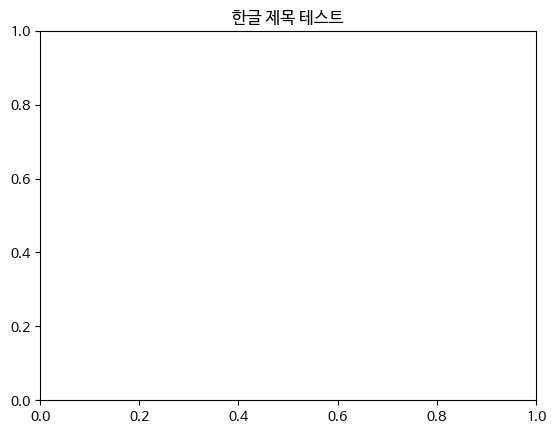

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
plt.rc('font', family='NanumBarunGothic')  # 폰트 패밀리 설정

# 폰트가 제대로 적용되었는지 확인
plt.title('한글 제목 테스트')
plt.show()


In [ ]:
#런타임 다시 실행한 후에는 변수값들이 초기화됩니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 데이터 업로드하기

In [ ]:
# CSV 파일 불러오기 및 데이터프레임 생성
df = pd.read_csv('cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (혈청지오티)ALT    2000 non-null   float64
 1   (혈청지오티)AST    2000 non-null   float64
 2   HDL 콜레스테롤     2000 non-null   float64
 3   LDL 콜레스테롤     2000 non-null   float64
 4   가입자 일련번호      2000 non-null   float64
 5   감마 지티피        2000 non-null   float64
 6   구강검진 수검여부     2000 non-null   float64
 7   기준년도          2000 non-null   float64
 8   성별코드          2000 non-null   float64
 9   수축기 혈압        2000 non-null   float64
 10  시도코드          2000 non-null   float64
 11  시력(우)         2000 non-null   float64
 12  시력(좌)         2000 non-null   float64
 13  식전혈당(공복혈당)    2000 non-null   float64
 14  신장(5Cm단위)     2000 non-null   float64
 15  연령대 코드(5세단위)  2000 non-null   float64
 16  요단백           2000 non-null   float64
 17  음주여부          2000 non-null   float64
 18  이완기 혈압        2000 non-null 

In [ ]:
#결측치 확인
df.isnull().sum()

(혈청지오티)ALT      0
(혈청지오티)AST      0
HDL 콜레스테롤       0
LDL 콜레스테롤       0
가입자 일련번호        0
감마 지티피          0
구강검진 수검여부       0
기준년도            0
성별코드            0
수축기 혈압          0
시도코드            0
시력(우)           0
시력(좌)           0
식전혈당(공복혈당)      0
신장(5Cm단위)       0
연령대 코드(5세단위)    0
요단백             0
음주여부            0
이완기 혈압          0
청력(우)           0
청력(좌)           0
체중(5Kg 단위)      0
총 콜레스테롤         0
치석              0
치아우식증유무         0
트리글리세라이드        0
허리둘레            0
혈색소             0
혈청크레아티닌         0
흡연상태            0
dtype: int64

In [ ]:
#기술통계 확인하기
df.describe()

,(혈청지오티)ALT,(혈청지오티)AST,HDL 콜레스테롤,LDL 콜레스테롤,가입자 일련번호,감마 지티피,구강검진 수검여부,기준년도,성별코드,수축기 혈압,...,청력(좌),체중(5Kg 단위),총 콜레스테롤,치석,치아우식증유무,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,26.050800,27.146600,55.97630,116.896700,1000.500000,38.531600,0.307500,2020.0,1.493000,124.298900,...,1.05100,62.657500,198.176600,0.561300,0.178100,126.089700,81.937600,14.177650,0.852070,1.574000
std,19.501451,16.075649,10.82792,26.666382,577.494589,77.941997,0.461574,0.0,0.500076,14.060176,...,0.23114,12.110885,29.966166,0.398248,0.258406,58.616239,9.510716,1.560856,0.351812,0.790466
min,4.000000,9.000000,24.00000,26.000000,1.000000,5.000000,0.000000,2020.0,1.000000,84.000000,...,1.00000,30.000000,89.000000,0.000000,0.000000,18.000000,53.000000,5.300000,0.300000,1.000000
25%,16.000000,20.000000,49.00000,102.000000,500.750000,16.000000,0.000000,2020.0,1.000000,114.000000,...,1.00000,55.000000,182.000000,0.200000,0.000000,88.600000,75.000000,13.200000,0.700000,1.000000
50%,21.000000,24.000000,55.60000,117.000000,1000.500000,23.000000,0.000000,2020.0,1.000000,124.000000,...,1.00000,60.000000,197.600000,0.600000,0.000000,115.300000,82.000000,14.200000,0.800000,1.000000
75%,30.000000,30.000000,61.60000,131.600000,1500.250000,38.000000,1.000000,2020.0,2.000000,133.000000,...,1.00000,70.000000,213.600000,0.800000,0.200000,149.400000,88.000000,15.200000,1.000000,2.000000
max,377.000000,334.000000,117.00000,256.000000,2000.000000,2322.000000,1.000000,2020.0,2.000000,191.000000,...,3.00000,120.000000,373.000000,2.000000,1.000000,537.000000,128.000000,19.800000,8.700000,3.000000


### 변수의 분포 확인

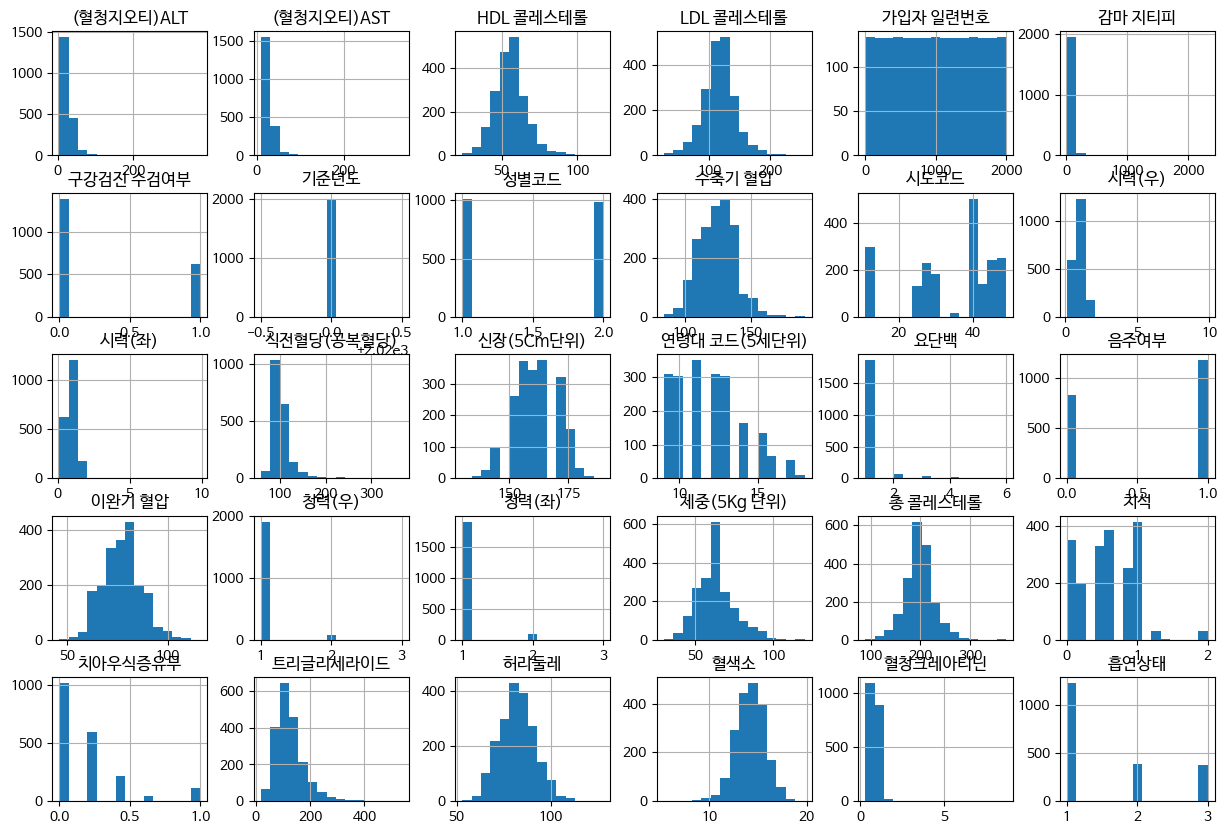

In [ ]:
# 히스토그램으로 변수의 분포 확인
df.hist(bins=15, figsize=(15, 10), layout=(5, 6))
plt.show()


### 변수간 관계 분석

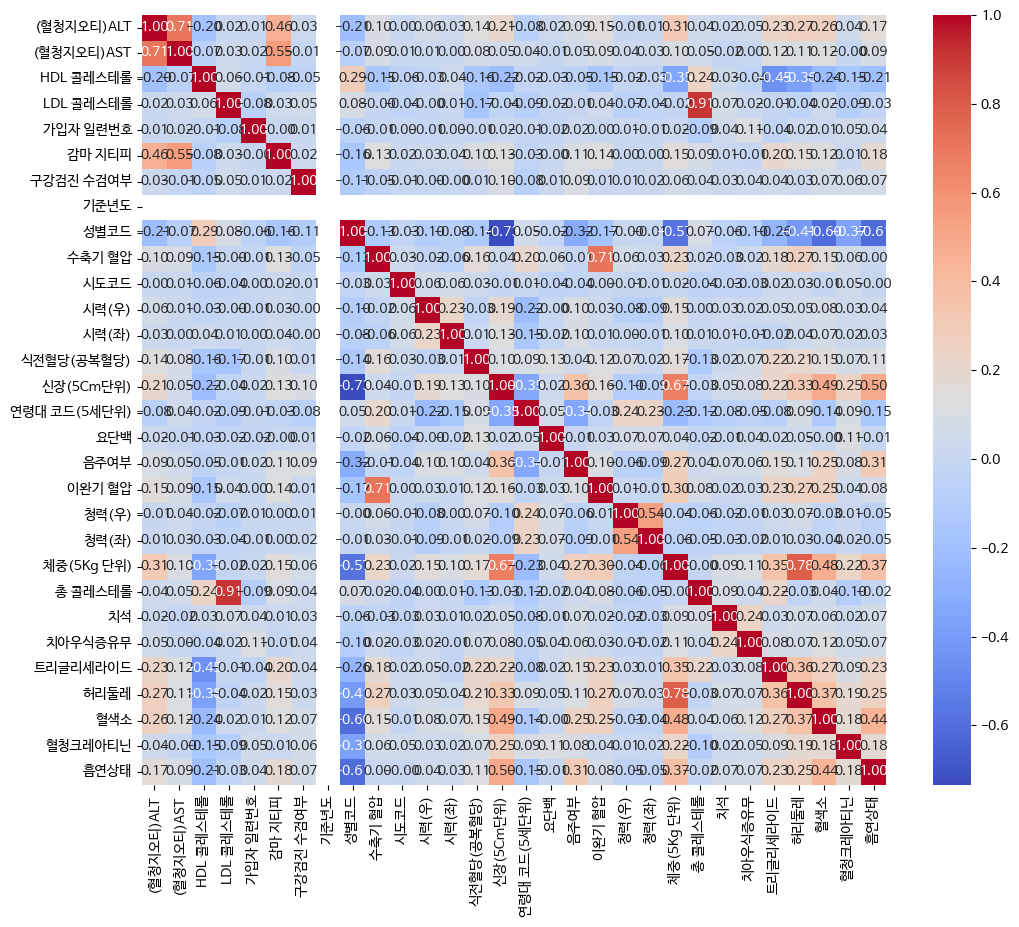

In [ ]:
# 상관 관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


### 범주형 데이터 분석

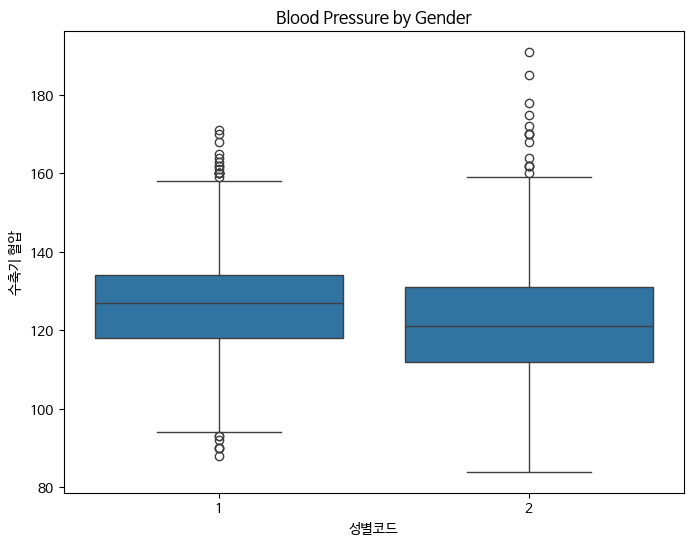

In [ ]:
# 범주형 데이터 분석 예: 성별코드에 따른 혈압 분석
plt.figure(figsize=(8, 6))
sns.boxplot(x='성별코드', y='수축기 혈압', data=df)
plt.title('Blood Pressure by Gender')
plt.show()

### 두 변수간 독립성 검정

카이스퀘어 검정(Chi-squared test)은 두 범주형 변수 간의 독립성을 테스트하는 통계적 방법입니다. 이 검정을 사용하는 주된 이유는 두 변수 사이에 통계적으로 유의미한 연관성이 있는지 여부를 알아보기 위해서입니다.

예를 들어, '성별코드'와 '흡연상태'의 경우, 성별에 따라 흡연 습관에 차이가 있는지 확인

1. 검정의 과정에서는 두 변수의 교차표(분할표)를 작성
2. 각 칸에서 관측된 빈도와 기대 빈도(해당 빈도가 두 변수가 서로 독립일 때 기대되는 값) 사이의 차이를 분석
3. 차이가 클수록, 즉 카이스퀘어 통계량이 크면 두 변수 사이에 연관성이 있을 가능성이 높다는 것을 의미

In [ ]:
# 성별코드와 흡연상태의 카이스퀘어 검정
from scipy.stats import chi2_contingency

# 범주형 데이터의 교차 테이블 생성
crosstab = pd.crosstab(df['성별코드'], df['흡연상태'])

# 카이스퀘어 검정 실행
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-Square Test:")
print("Chi2 Statistic:", chi2, "P-value:", p)


Chi-Square Test:
Chi2 Statistic: 886.1733364988885 P-value: 3.71453944373026e-193


< 통계 분석 결과 >

* Chi2 Statistic: 886.1733364988885. 이 값은 매우 크며, 이는 두 범주형 변수 사이에 강한 연관성이 있음을 나타냅니다. 카이스퀘어 통계량이 클수록 관측된 빈도와 기대 빈도 사이의 차이가 크다는 것을 의미하며, 이는 두 변수 사이에 유의미한 관계가 있다는 강력한 증거를 제공합니다.

* P-value: 3.71453944373026e-193. 이 p-값은 매우 작은 수치로, 거의 0에 가깝습니다. 일반적으로 p-값이 0.05 이하일 경우 두 변수 사이에 통계적으로 유의한 연관성이 있다고 간주하는데, 이 경우 p-값이 0.05보다 훨씬 낮습니다.

 < 해석하기 >

 * p-value가 매우 낮기 때문에,  귀무가설(두 변수가 서로 독립적이다)을 기각
 * 대립가설(두 변수가 서로 독립적이지 않다)을 채택

 즉, 통계적으로 유의미하게 두 변수 사이에는 강한 관련성이 있습니다.

성별과 흡연 상태 는 서로 연관되어 있으며, 한 변수의 변화가 다른 변수에 영향을 미칠 수 있으므로 특정 성별에서 흡연율이 높거나 낮은 이유를 분석하는 등으로 활용할 수 있다.

## 컬럼 선택 분석

'수축기 혈압', '이완기 혈압', '성별코드', '흡연상태'




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임에서 특정 컬럼 선택
selected_columns = df[['수축기 혈압', '이완기 혈압', '성별코드', '흡연상태']]


**선택한 컬럼에 대한 데이터 분석**

1. 기본 통계 - 선택된 컬럼의 기술적 통계 요약을 제공합니다.
2. 히스토그램 - 수치 데이터의 분포를 시각화합니다.
3. 박스플롯 - 성별에 따른 수축기 혈압과 이완기 혈압의 분포를 시각화합니다.
4. 평균 혈압 비교 - 흡연 여부에 따른 평균 수축기 혈압과 이완기 혈압을 계산합니다.

In [ ]:
# 기술적 통계 출력
print("Descriptive Statistics:")
print(selected_columns.describe())

Descriptive Statistics:
            수축기 혈압       이완기 혈압         성별코드         흡연상태
count  1984.000000  1984.000000  2000.000000  2000.000000
mean    124.292843    76.714214     1.493000     1.574000
std      14.105268     9.641505     0.500076     0.790466
min      84.000000    46.000000     1.000000     1.000000
25%     114.000000    70.000000     1.000000     1.000000
50%     124.000000    77.000000     1.000000     1.000000
75%     133.000000    83.000000     2.000000     2.000000
max     191.000000   116.000000     2.000000     3.000000


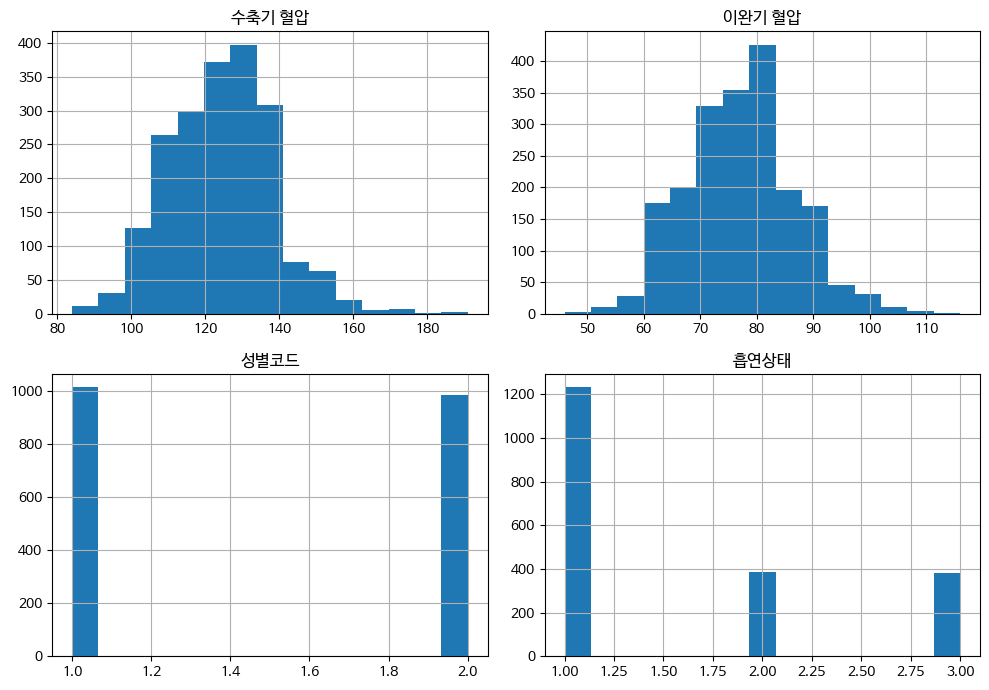

In [ ]:
# 히스토그램 그리기
selected_columns.hist(bins=15, figsize=(10, 7))
plt.tight_layout()
plt.show()

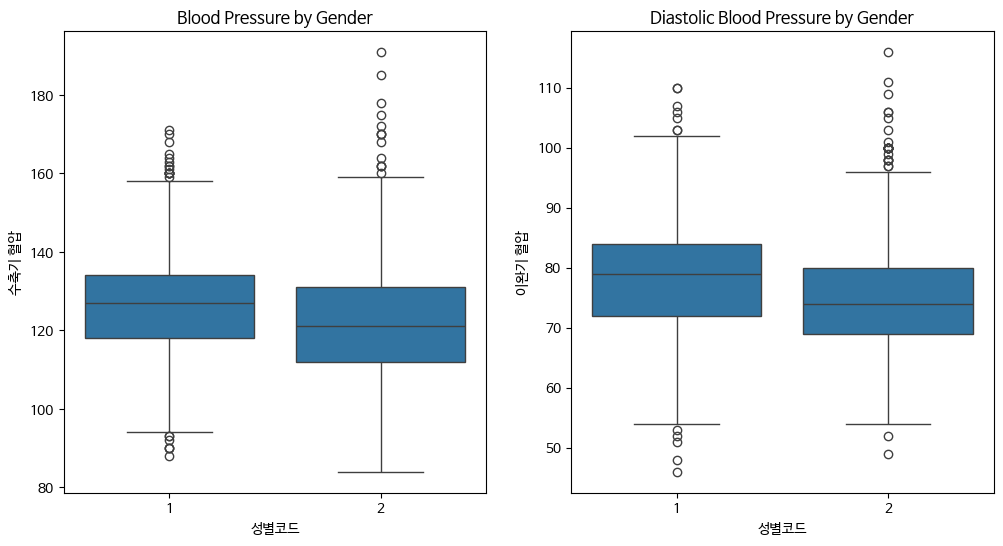

In [ ]:
# 성별에 따른 혈압 분포 시각화 (박스플롯)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

#'성별코드', '수축기혈압'
sns.boxplot(x='성별코드', y='수축기 혈압', data=selected_columns)
plt.title('Blood Pressure by Gender')

plt.subplot(1, 2, 2)

##'성별코드', '이완기혈압'
sns.boxplot(x='성별코드', y='이완기 혈압', data=selected_columns)
plt.title('Diastolic Blood Pressure by Gender')
plt.show()


In [ ]:

# 흡연상태에 따른 평균 혈압 계산
mean_bp_by_smoking = selected_columns.groupby('흡연상태').agg({'수축기 혈압': 'mean', '이완기 혈압': 'mean'})
print("Mean Blood Pressure by Smoking Status:")
print(mean_bp_by_smoking)


Mean Blood Pressure by Smoking Status:
          수축기 혈압     이완기 혈압
흡연상태                       
1.0   124.036039  76.047240
2.0   125.687629  77.970103
3.0   123.733158  77.580000


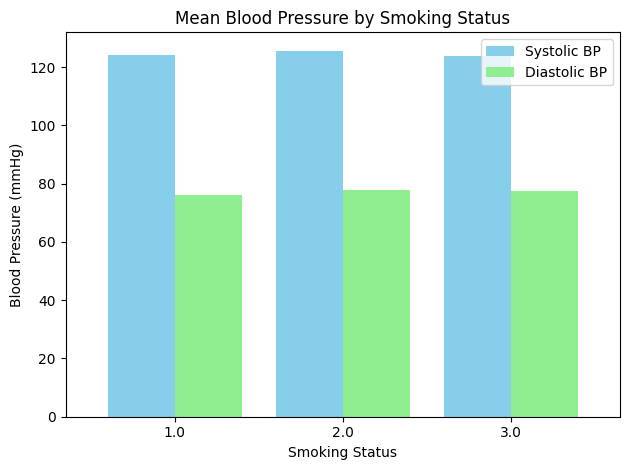

In [ ]:
#각 흡연상태별 평균 혈압의 차이 비교
# 막대 그래프로 시각화
ax = mean_bp_by_smoking.plot(kind='bar', color=['skyblue', 'lightgreen'], width=0.8)
plt.title('Mean Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Blood Pressure (mmHg)')
plt.xticks(rotation=0)
plt.legend(["Systolic BP", "Diastolic BP"])
plt.tight_layout()
plt.show()

## 이상치 처리

In [ ]:
selected_columns.describe()

,수축기 혈압,이완기 혈압,성별코드,흡연상태
count,1984.000000,1984.000000,2000.000000,2000.000000
mean,124.292843,76.714214,1.493000,1.574000
std,14.105268,9.641505,0.500076,0.790466
min,84.000000,46.000000,1.000000,1.000000
25%,114.000000,70.000000,1.000000,1.000000
50%,124.000000,77.000000,1.000000,1.000000
75%,133.000000,83.000000,2.000000,2.000000
max,191.000000,116.000000,2.000000,3.000000


In [ ]:
# 이상치를 확인하고 제거할 컬럼 선택
cols_to_check = ['수축기 혈압', '이완기 혈압', '허리둘레', '체중(5Kg 단위)']
cleaned_df = []

# 각 컬럼에 대해 이상치 제거 수행
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 아닌 데이터만 필터링
    cleaned_df_outlier = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# 이상치 제거 후 데이터 확인
print("Data after removing outliers:")
print(cleaned_df_outlier.describe())


Data after removing outliers:
        (혈청지오티)ALT   (혈청지오티)AST    HDL 콜레스테롤    LDL 콜레스테롤     가입자 일련번호  \
count  1968.000000  1968.000000  1968.000000  1968.000000  1968.000000   
mean     25.681707    26.989431    56.102846   116.830183   998.539634   
std      18.954265    15.868475    10.830988    26.722283   577.021515   
min       4.000000     9.000000    24.000000    26.000000     1.000000   
25%      16.000000    20.000000    49.200000   101.800000   499.750000   
50%      21.000000    24.000000    55.600000   117.000000   998.500000   
75%      30.000000    29.000000    61.800000   131.600000  1495.250000   
max     377.000000   334.000000   117.000000   256.000000  2000.000000   

            감마 지티피    구강검진 수검여부    기준년도         성별코드       수축기 혈압  ...  \
count  1968.000000  1968.000000  1968.0  1968.000000  1968.000000  ...   
mean     38.225711     0.306911  2020.0     1.499492   124.206707  ...   
std      78.217193     0.461329     0.0     0.500127    14.043563  ...   
min    

## 데이터 시각화

In [ ]:
# 이상치 처리 결과 확인
cleaned_df_outlier.head()

,(혈청지오티)ALT,(혈청지오티)AST,HDL 콜레스테롤,LDL 콜레스테롤,가입자 일련번호,감마 지티피,구강검진 수검여부,기준년도,성별코드,수축기 혈압,...,청력(좌),체중(5Kg 단위),총 콜레스테롤,치석,치아우식증유무,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
0,27.0,21.0,58.0,118.0,1.0,21.0,0.0,2020.0,1.0,127.0,...,1.0,60.0,188.0,0.6,0.2,58.0,72.1,15.0,1.1,1.0
1,15.0,18.0,44.4,119.4,2.0,15.0,0.0,2020.0,2.0,110.0,...,1.0,65.0,185.6,0.4,0.2,107.6,81.0,12.7,0.5,1.0
2,25.0,27.0,48.6,119.2,3.0,7.0,0.0,2020.0,2.0,123.0,...,1.0,55.0,189.8,0.4,0.2,98.2,70.0,12.8,0.7,1.0
3,97.0,65.0,51.2,91.2,4.0,72.0,1.0,2020.0,1.0,134.0,...,1.0,70.0,168.6,0.0,0.0,128.0,90.8,16.4,1.2,1.0
4,17.0,18.0,53.0,133.0,5.0,14.0,0.0,2020.0,2.0,144.0,...,1.0,50.0,220.0,0.8,0.2,171.0,75.2,12.4,0.7,1.0


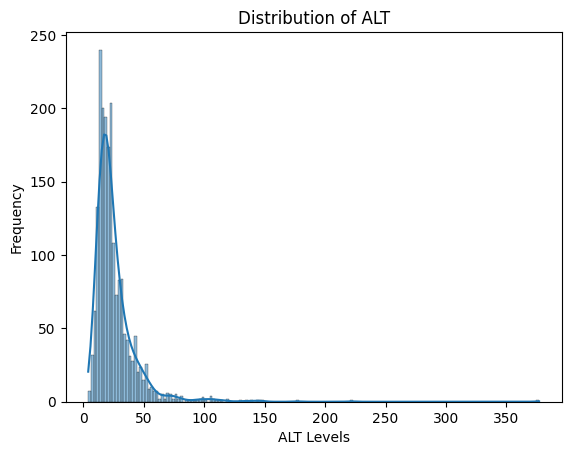

In [ ]:
# '혈청지오티)ALT'의 분포를 히스토그램으로 표현
sns.histplot(cleaned_df_outlier['(혈청지오티)ALT'], kde=True)
plt.title('Distribution of ALT')
plt.xlabel('ALT Levels')
plt.ylabel('Frequency')
plt.show()

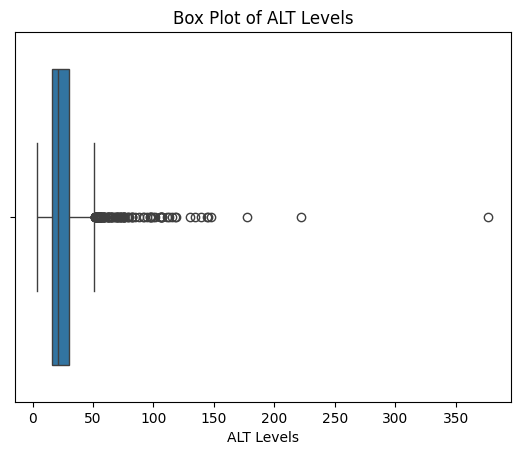

In [ ]:
# '혈청지오티)ALT'의 상자 그림
sns.boxplot(x=cleaned_df_outlier['(혈청지오티)ALT'])
plt.title('Box Plot of ALT Levels')
plt.xlabel('ALT Levels')
plt.show()


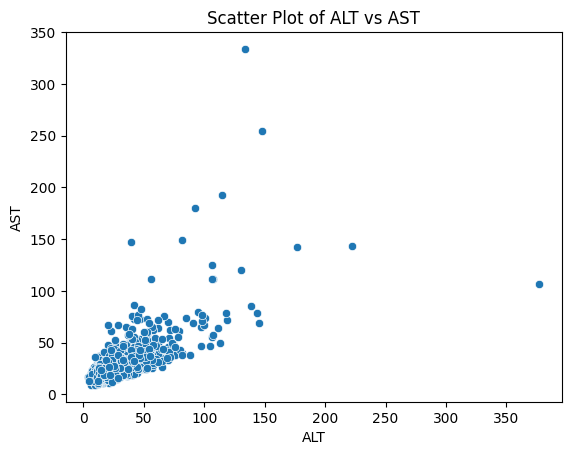

In [ ]:
# '혈청지오티)ALT'와 '혈청지오티)AST'의 관계를 산점도로 표현
sns.scatterplot(x=cleaned_df_outlier['(혈청지오티)ALT'], y=cleaned_df_outlier['(혈청지오티)AST'])
plt.title('Scatter Plot of ALT vs AST')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.show()


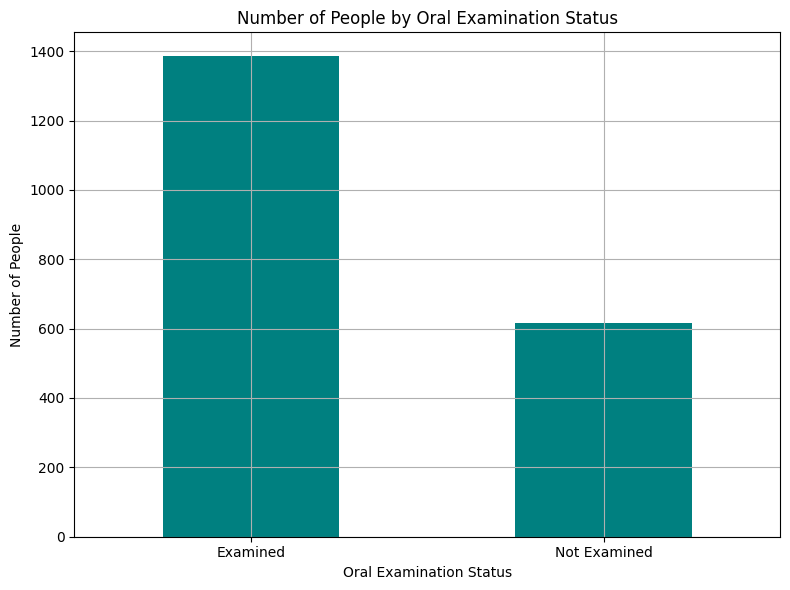

구강검진 수검여부
0.0    1385
1.0     615
Name: count, dtype: int64

In [ ]:
# '구강검진 수검여부' 컬럼의 데이터 분포 확인 및 시각화
oral_exam_counts = df['구강검진 수검여부'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
oral_exam_counts.plot(kind='bar', color='teal')
plt.title('Number of People by Oral Examination Status')
plt.xlabel('Oral Examination Status')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1], labels=['Examined', 'Not Examined'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

oral_exam_counts


<Figure size 1000x700 with 0 Axes>

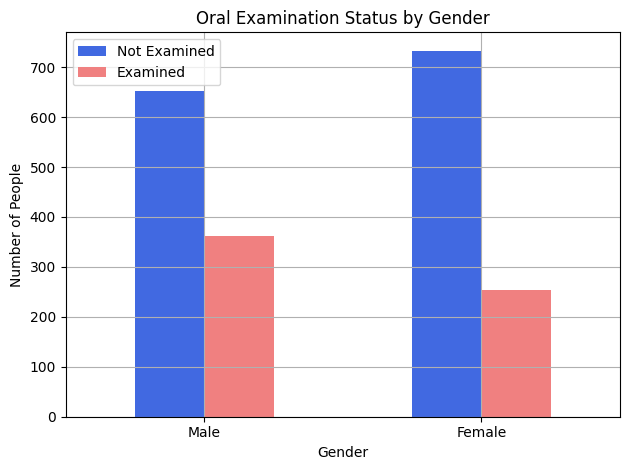

구강검진 수검여부,0.0,1.0
성별코드,,
1.0,652,362
2.0,733,253


In [ ]:
#구강검진여부로 그룹화한 다음 성별 카운트
# 성별과 구강검진 수검여부에 따라 데이터 그룹화 및 갯수 세기
grouped_data = df.groupby(['성별코드', '구강검진 수검여부']).size().unstack()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 7))
grouped_data.plot(kind='bar', color=['royalblue', 'lightcoral'])
plt.title('Oral Examination Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(['Not Examined', 'Examined'])
plt.grid(True)
plt.tight_layout()
plt.show()

# 출력 결과 반환
grouped_data


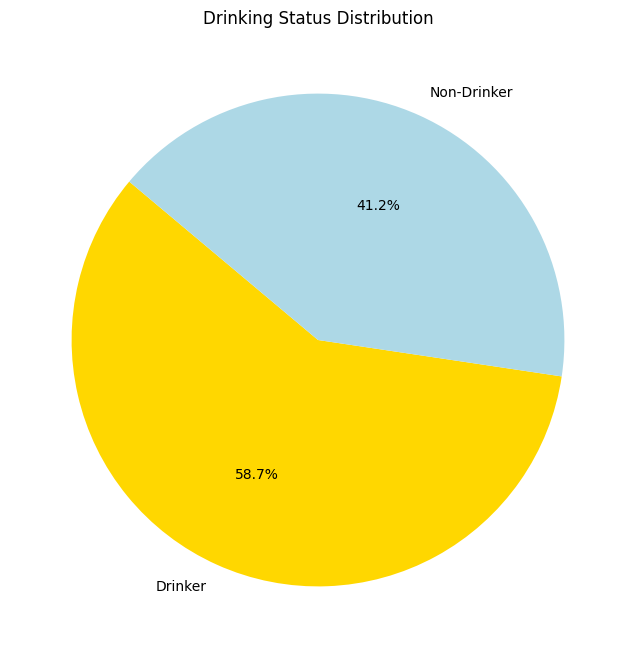

음주여부
1.0    1175
0.0     825
Name: count, dtype: int64

In [ ]:
# '음주여부' 컬럼의 데이터 분포 확인
drink_status_counts = df['음주여부'].value_counts()

# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(drink_status_counts, labels=['Drinker', 'Non-Drinker'], autopct='%1.1f%%', colors=['gold', 'lightblue'], startangle=140)
plt.title('Drinking Status Distribution')
plt.show()

# 출력 결과 반환
drink_status_counts
